In [2]:
import numpy as np

In [3]:
import pandas as pd

In [30]:
np.random.seed(42)

In [31]:
apartments=[f"Apt_{i}" for i in range(1,21)]

In [32]:
dates=pd.date_range(start="2025-07-01",periods=30,freq="D")

In [33]:
data={
    "Date":np.tile(dates,len(apartments)),
    "Apartments":np.repeat(apartments,len(dates)),
    "Electricity_usage":np.random.normal(loc=20,scale=5,size=len(dates)*len(apartments))
}

In [50]:
data

{'Date': array(['2025-07-01T00:00:00.000000000', '2025-07-02T00:00:00.000000000',
        '2025-07-03T00:00:00.000000000', '2025-07-04T00:00:00.000000000',
        '2025-07-05T00:00:00.000000000', '2025-07-06T00:00:00.000000000',
        '2025-07-07T00:00:00.000000000', '2025-07-08T00:00:00.000000000',
        '2025-07-09T00:00:00.000000000', '2025-07-10T00:00:00.000000000',
        '2025-07-11T00:00:00.000000000', '2025-07-12T00:00:00.000000000',
        '2025-07-13T00:00:00.000000000', '2025-07-14T00:00:00.000000000',
        '2025-07-15T00:00:00.000000000', '2025-07-16T00:00:00.000000000',
        '2025-07-17T00:00:00.000000000', '2025-07-18T00:00:00.000000000',
        '2025-07-19T00:00:00.000000000', '2025-07-20T00:00:00.000000000',
        '2025-07-21T00:00:00.000000000', '2025-07-22T00:00:00.000000000',
        '2025-07-23T00:00:00.000000000', '2025-07-24T00:00:00.000000000',
        '2025-07-25T00:00:00.000000000', '2025-07-26T00:00:00.000000000',
        '2025-07-27T00:00:00.0

In [51]:
df=pd.DataFrame(data)

In [52]:
df["Electricity_usage"]=df["Electricity_usage"].round(2)
print(df.isnull().sum())

Date                 0
Apartments           0
Electricity_usage    0
dtype: int64


In [53]:
print(df.dtypes)

Date                 datetime64[ns]
Apartments                   object
Electricity_usage           float64
dtype: object


In [54]:
usage_per_apartment= df.groupby("Apartments")["Electricity_usage"].sum().sort_values(ascending=False)
print(usage_per_apartment)

Apartments
Apt_11    642.31
Apt_6     641.82
Apt_13    634.22
Apt_10    616.09
Apt_20    613.14
Apt_7     609.87
Apt_8     607.18
Apt_16    606.97
Apt_14    604.33
Apt_3     601.93
Apt_4     596.99
Apt_15    591.38
Apt_19    586.61
Apt_5     585.76
Apt_2     581.81
Apt_9     578.48
Apt_1     571.80
Apt_17    570.33
Apt_12    568.99
Apt_18    549.49
Name: Electricity_usage, dtype: float64


In [55]:
daily_avg=df.groupby("Date") ["Electricity_usage"].mean()
print(daily_avg.head())

Date
2025-07-01    21.0440
2025-07-02    20.8695
2025-07-03    19.5685
2025-07-04    20.9855
2025-07-05    19.7835
Name: Electricity_usage, dtype: float64


In [56]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

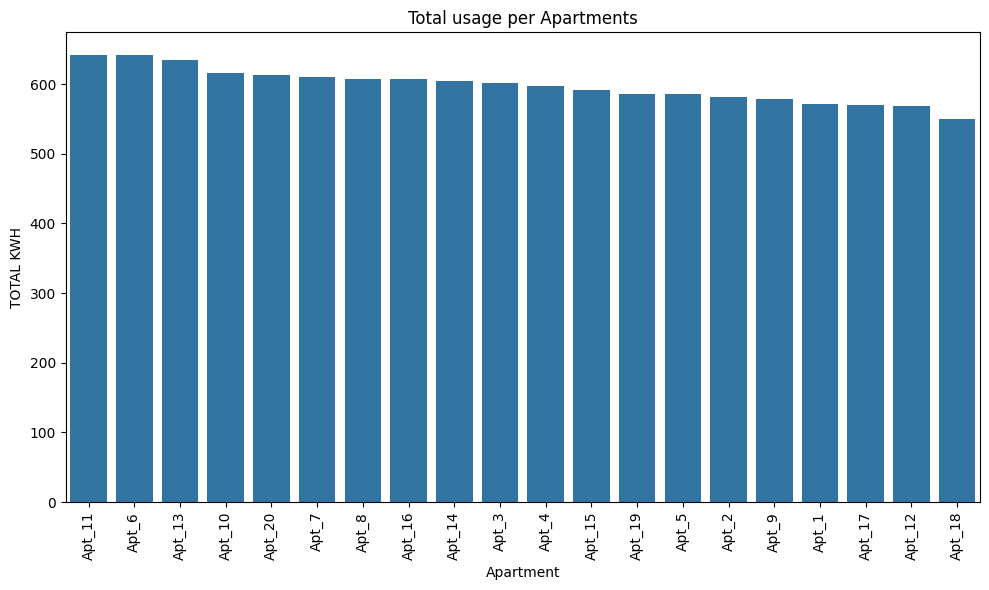

In [69]:
plt.figure(figsize=(10,6))
sns.barplot(x= usage_per_apartment.index, y=usage_per_apartment.values)
plt.xticks(rotation=90)
plt.title("Total usage per Apartments")
plt.xlabel("Apartment")
plt.ylabel("TOTAL KWH")
plt.tight_layout()
plt.show()

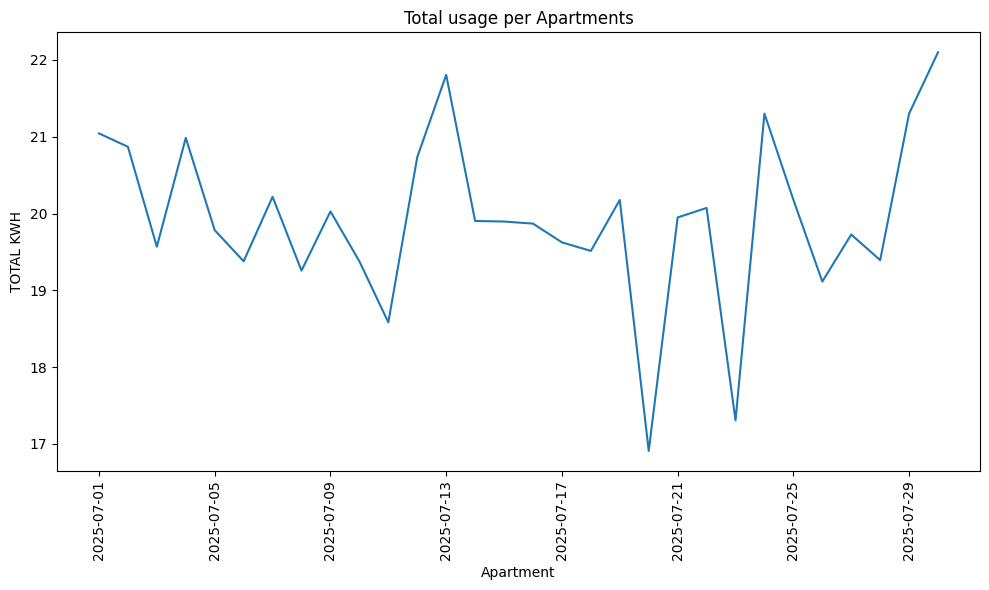

In [71]:
plt.figure(figsize=(10,6))
sns.lineplot(x=daily_avg.index, y=daily_avg.values)
plt.xticks(rotation=90)
plt.title("Total usage per Apartments")
plt.xlabel("Apartment")
plt.ylabel("TOTAL KWH")
plt.tight_layout()
plt.show()


In [74]:
threshold= df["Electricity_usage"].mean()+2*df["Electricity_usage"].std()
df["High_usage_flag"]=df["Electricity_usage"]>threshold
print(df[df["High_usage_flag"]==True].head())

NameError: name 'true' is not defined